In [2]:
import operator
import itertools

In [3]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect('./MillionSongSubset/AdditionalFiles/subset_track_metadata.db')

In [5]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [6]:
sql = """SELECT *
        FROM "songs" """

metadata = pd.read_sql(sql, con=conn)

In [7]:
metadata

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,TRACCSW128F148C7C3,If I...,SODMVJR12A6D4F985D,Ill Na Na,ARDI88R1187B98DAB2,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,222.92853,0.687687,0.406686,0
3,TRACCXJ128F428F0CF,Werther - Lyric Drama in four Acts/Act I/Alors...,SOIWBDR12A8C13A4AC,Massenet: Werther,ARUKJUP12086C14589,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,278.38649,0.391741,0.291265,0
4,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010
5,TRACCKS128F42B77AE,Murder One,SOBOAQC12A8C13E3E9,BTNHRESURRECTION,ARUZRFN1187B98AC05,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
6,TRACCQM12903CACC1E,On My Feet Again,SOKVLHX12AB0187B39,Utopia,ARHBWOZ1187FB3FD53,e6ff2839-5ccb-451b-b07e-f485bc143118,Utopia,239.59465,0.543937,0.430300,0
7,TRACCUS128F92E1FEB,Bedroom Acoustics,SOMMSMW12A8C13FCCC,Plug In Baby,ARR3ONV1187B9A2F59,fd857293-5ab8-40de-b29e-55a69d4e4d0f,Muse,156.96934,0.929030,0.750427,0
8,TRACCJA128F149A144,Segredo,SODPNJR12A6D4FA52D,Joao Voz E Violato,AR3THYK1187B999F1F,286ec4c2-b5ca-4f85-b331-280a6d73dd14,João Gilberto,197.19791,0.645192,0.471224,2000
9,TRACCGB12903CD1B90,Sajana (Ft Faheem Mazhar),SOFFLLP12AB018ED52,The Lost Souls Bonus EP,ARFELOH1187B991F95,65b785d9-499f-48e6-9063-3a1fd1bd488d,Niraj Chag,262.58240,0.495819,0.342765,0


In [8]:
dur = metadata.groupby(by = 'year').mean()

In [9]:
dur.drop(labels=0, inplace=True)

In [10]:
dur

,duration,artist_familiarity,artist_hotttnesss
year,,,
1926,176.770160,0.594867,0.382847
1927,188.699410,0.564467,0.384586
1929,191.111380,0.574300,0.375594
1930,196.753830,0.546650,0.364315
1934,173.322000,0.574300,0.375594
1935,176.090975,0.519000,0.353036
1936,192.809340,0.481704,0.342627
1940,165.655055,0.572471,0.424488
1947,177.906485,0.425883,0.313648


Text(0.5,1,'Histogram of Music Release dates')

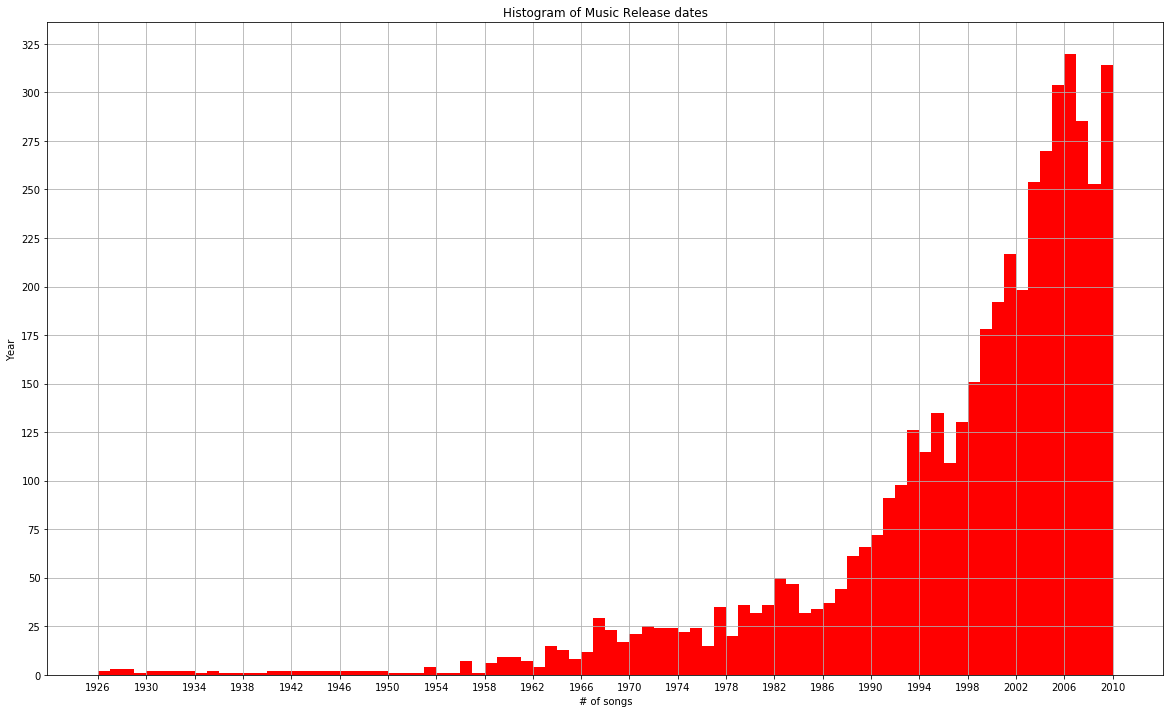

In [11]:
plt.figure(figsize=(20,12))
plt.hist(metadata['year'], bins=dur.index, color = 'red');
plt.ylabel('Year'); plt.xlabel('# of songs')
plt.xticks(np.arange(1926,2014,4));plt.yticks(np.arange(0,350,25))
plt.grid(b = True,which = 'both', axis = 'both')
plt.title('Histogram of Music Release dates')
#sns.barplot(x = dur.index, y = dur['duration'], color = 'blue')

Text(0.5,1,'Plot of Music year vs Duration(sec)')

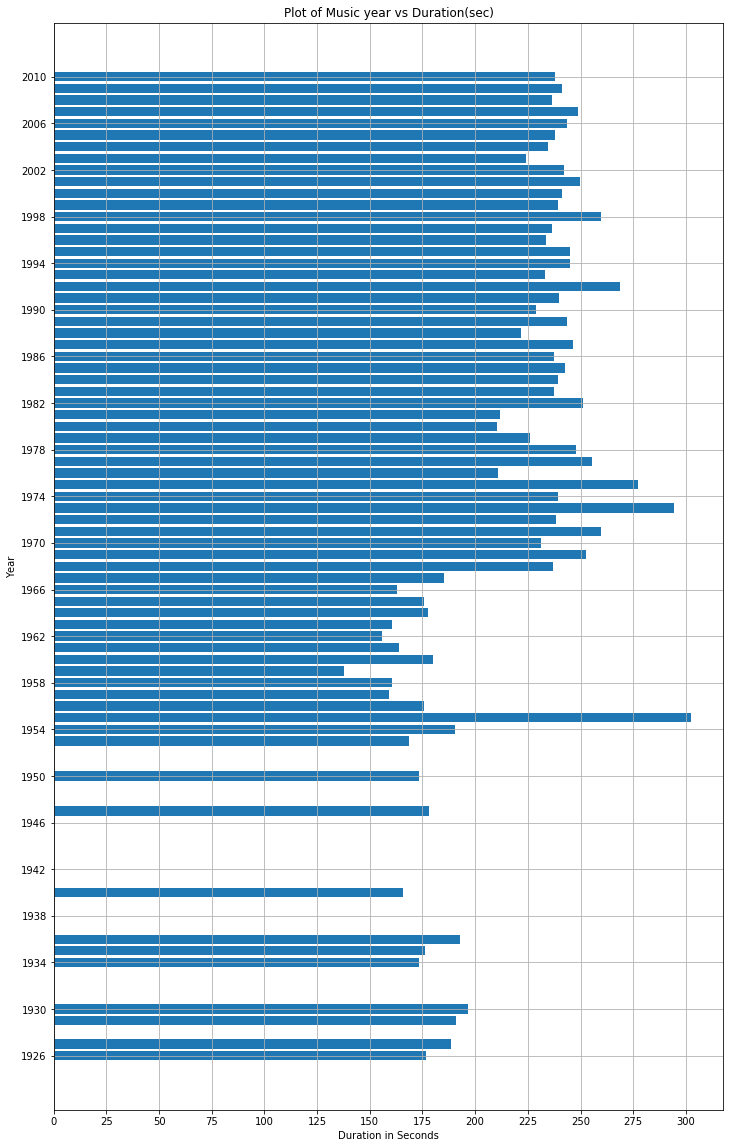

In [12]:
plt.figure(figsize=(12,20))
plt.barh(y = dur.index, width = dur['duration'])
plt.ylabel('Year'); plt.xlabel('Duration in Seconds')
plt.yticks(np.arange(1926,2014,4)); plt.xticks(np.arange(0,325,25))
plt.grid(b = True, which = 'both', axis = 'both')
plt.title('Plot of Music year vs Duration(sec)')

In [13]:
mbtags = open('./MillionSongSubset/AdditionalFiles/subset_unique_mbtags.txt')

In [14]:
tags = mbtags.readlines()

In [15]:
tracks_per_year = pd.read_csv('./MillionSongSubset/AdditionalFiles/subset_tracks_per_year.txt', sep = '<SEP>')

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [16]:
tracks_per_year.columns = ['year','ID','Artist','Song']

In [17]:
group = tracks_per_year.groupby('year')

In [18]:
group_count = group.count()[['Song']]

/home/ec2-user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Plot of Music year vs Duration(sec)')

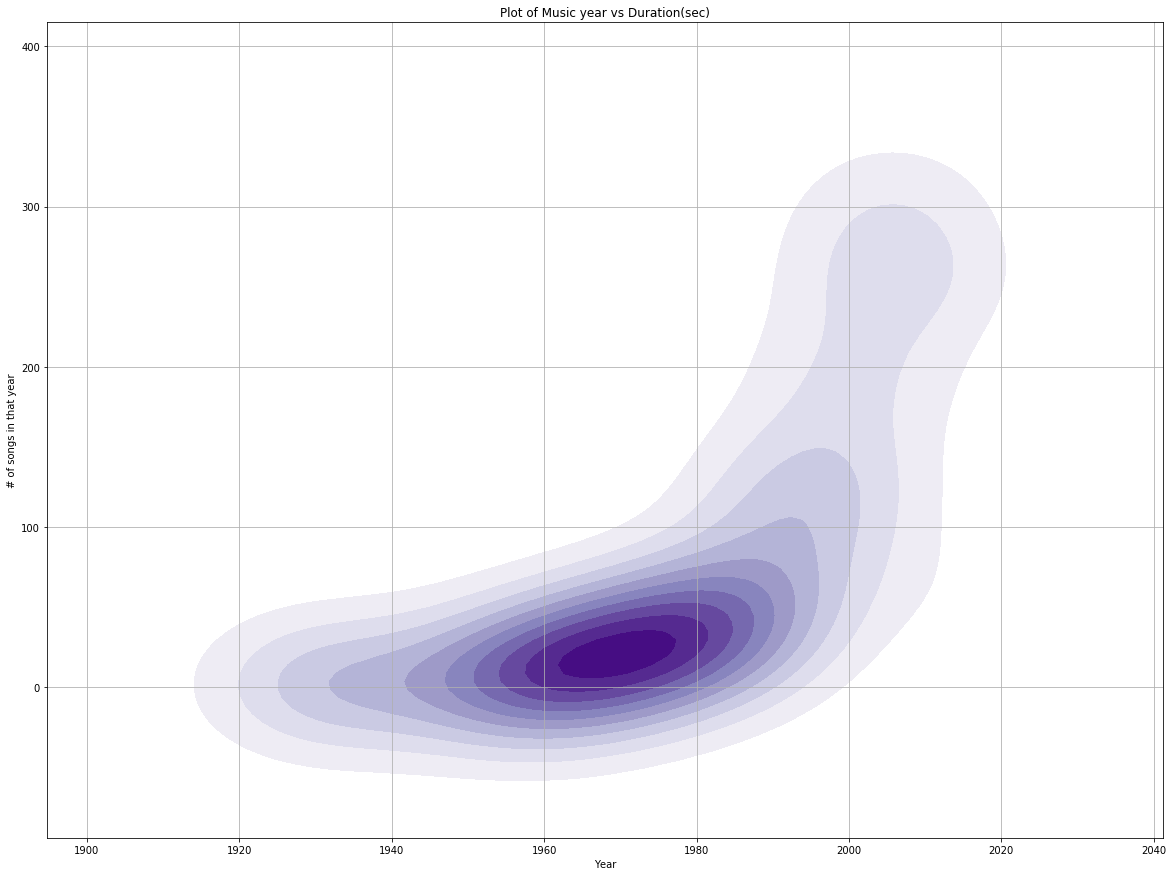

In [23]:
plt.figure(figsize=(20,15))
sns.kdeplot(data = group_count.index, data2 = group_count['Song'],cmap="Purples", shade=True, shade_lowest=False)
plt.xlabel('Year'); plt.ylabel('# of songs in that year')
plt.grid(b = True, which = 'both', axis = 'both')
plt.title('Plot of Music year vs Duration(sec)')

In [20]:
sns.

SyntaxError: invalid syntax (<ipython-input-20-40c5c93bca4b>, line 1)